In [1]:
# Importando librerías

import numpy as np
import matplotlib.pyplot as plt
import time
err_vector = [] #vector de error
w_f = [] #vector de pesos finales
#Entradas
x = np.array([
    [2,6],
    [4,4],
    [6,3],
    [4,10],
    [7,10],
    [9,8]
])
print(f"Entradas: \n{x}")

Entradas: 
[[ 2  6]
 [ 4  4]
 [ 6  3]
 [ 4 10]
 [ 7 10]
 [ 9  8]]


In [2]:
#Targets
t = np.array([
    [0],[0],[0],[1],[1],[1],
])
print(f"Objetivos: \n{t}")

Objetivos: 
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [3]:
#bias
bias = np.shape(x)[0] #[0] -> columnas [1] -> filas
bias = -1*np.ones((bias, 1))
print(f"bias:\n {bias}")

bias:
 [[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


In [4]:
#Vector aumentado
#Se tiene que usar el bias
x = np.concatenate([x, bias], axis = 1)
print(f"Vector aumentado: \n {x}")

Vector aumentado: 
 [[ 2.  6. -1.]
 [ 4.  4. -1.]
 [ 6.  3. -1.]
 [ 4. 10. -1.]
 [ 7. 10. -1.]
 [ 9.  8. -1.]]


In [5]:
#Pesos
w_i = np.array([[0.25],[0.25], [1.0]])
print(f"Pesos:\n {w_i}")

Pesos:
 [[0.25]
 [0.25]
 [1.  ]]


In [6]:
alpha = 0.25
#Tiempo
tic =  time.time() #Se inicia cronometro

In [7]:
#Regla del perceptron
a = np.dot(x, w_i)
print(f"a: {a}")

a: [[1.  ]
 [1.  ]
 [1.25]
 [2.5 ]
 [3.25]
 [3.25]]


In [8]:
#Funciòn limite duro
y = np.uint32(a >= 0)
print(f"y:\n {y}")

y:
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [9]:
# Función de costo -- MSE Error cuadrático medio
err = sum((t - y) ** 2) / len(y)
err_vector.append(err)
print(f"Error:\n{err_vector}\n")
epoch = 0

Error:
[array([0.5])]



In [10]:
while(sum(y != t)): #mientras la salida de la RNA no sea igual al target
  epoch += 1
  #print(f"Epoca: {epoch}\n")

  for i in range(np.shape(x)[0]): #Repetir segun la cantidad de filas de x
    # Producto punto
    a = np.dot(x[i], w_i)

    #Limite Duro
    y[i]= np.uint32(a >= 0)

    # Actualización de pesos
    x_p = np.reshape(x[i], (len(w_i), 1)) #REACOMODA np.reshape(matriz,(filas,columnas))
    w_n = w_i + alpha * (t[i] - y[i]) * x_p
    w_i = w_n
    #print(f"Peso nuevo:\n{w_i}\n")
 
  # Función de costo -- MSE Error cuadrático medio
  err = sum((t - y) ** 2) / len(y)
  err_vector.append(err)
  #print(f"Error:\n{err}\n")

  #Se añade al vector de pesos
  w_f.append(w_i)
  #print(f"Vector de Pesos Finales:\n{w_f}\n")


toc = time.time() #Paro cronometro

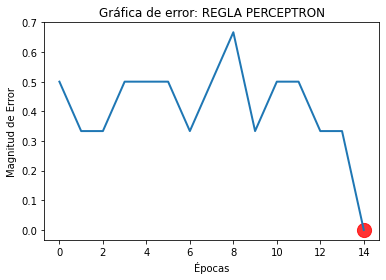

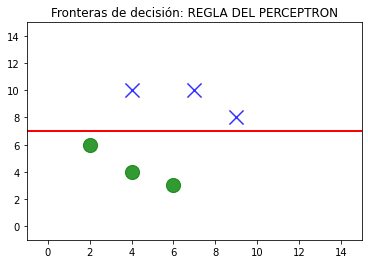

In [11]:
# Plotting Error -- Graph
plt.figure(0)
plt.plot(err_vector, linewidth = 2)
plt.title('Gráfica de error: REGLA PERCEPTRON')
plt.ylabel('Magnitud de Error')
plt.xlabel('Épocas')
plt.scatter(len(err_vector) - 1, 0, color = 'r', s = 200, marker = 'o', alpha = 0.8)
plt.show()

# Plotting Decision Boundaries
plt.xlim([-1.0, 15.0])
plt.ylim([-1.0, 15.0])

patterns = np.unique(t) #Encuentra los elementos únicos de la matriz t

for patt in patterns:
  pos = np.where(patt == t)[0] # np.where(TRUE)[0]
  if patt == 0:
    plt.scatter(x[pos, 0], x[pos, 1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
  else:
    plt.scatter(x[pos, 0], x[pos, 1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

x1 = np.linspace(-1, 15)
x2 = w_i[2] / w_i[1] - (x1 * w_i[0]) / w_i[1]

plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)
plt.title('Fronteras de decisión: REGLA DEL PERCEPTRON')
plt.show()

In [12]:
#Pesos Finales
print('\nPesos finales: ')
for i in range(1):
    res = str(w_i)
    print(res)
    print()
#------------------------------------------------------------------
# Displaying Results
a = np.dot(x, w_i)
y= np.uint32(a >= 0)

print('REGLA DEL PERCEPTRON')
print('Meta:    Predicción:')
for i in range(len(y)):
    res = str(t[i]) + '--------' + str(y[i])
    print(res)

print(f'\nTiempo requerido: {toc - tic:.5f} ms.')
print(f'\nÉpocas requeridas: {epoch}.')


Pesos finales: 
[[0. ]
 [0.5]
 [3.5]]

REGLA DEL PERCEPTRON
Meta:    Predicción:
[0]--------[0]
[0]--------[0]
[0]--------[0]
[1]--------[1]
[1]--------[1]
[1]--------[1]

Tiempo requerido: 0.07299 ms.

Épocas requeridas: 14.


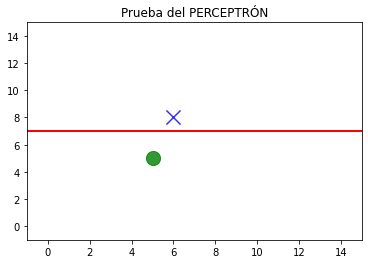

In [13]:
#Prueba
# Plotting Decision Boundaries
plt.xlim([-1.0, 15.0])
plt.ylim([-1.0, 15.0])


plt.scatter(5, 5, color = 'g', s = 200, marker = 'o', alpha = 0.8)
plt.scatter(6, 8, color = 'b', s = 200, marker = 'x', alpha = 0.8)

x1 = np.linspace(-1, 15)
x2 = w_i[2] / w_i[1] - (x1 * w_i[0]) / w_i[1]

plt.plot(x1, x2, 'red', linewidth = 2)
plt.title('Prueba del PERCEPTRÓN')
plt.show()